In [1]:
from DirectDetection import DirectDetection as DD
import numpy as np
import matplotlib.pyplot as plt
from sigfig import round

In [2]:
DD.init()

Found: 114 files...Done!


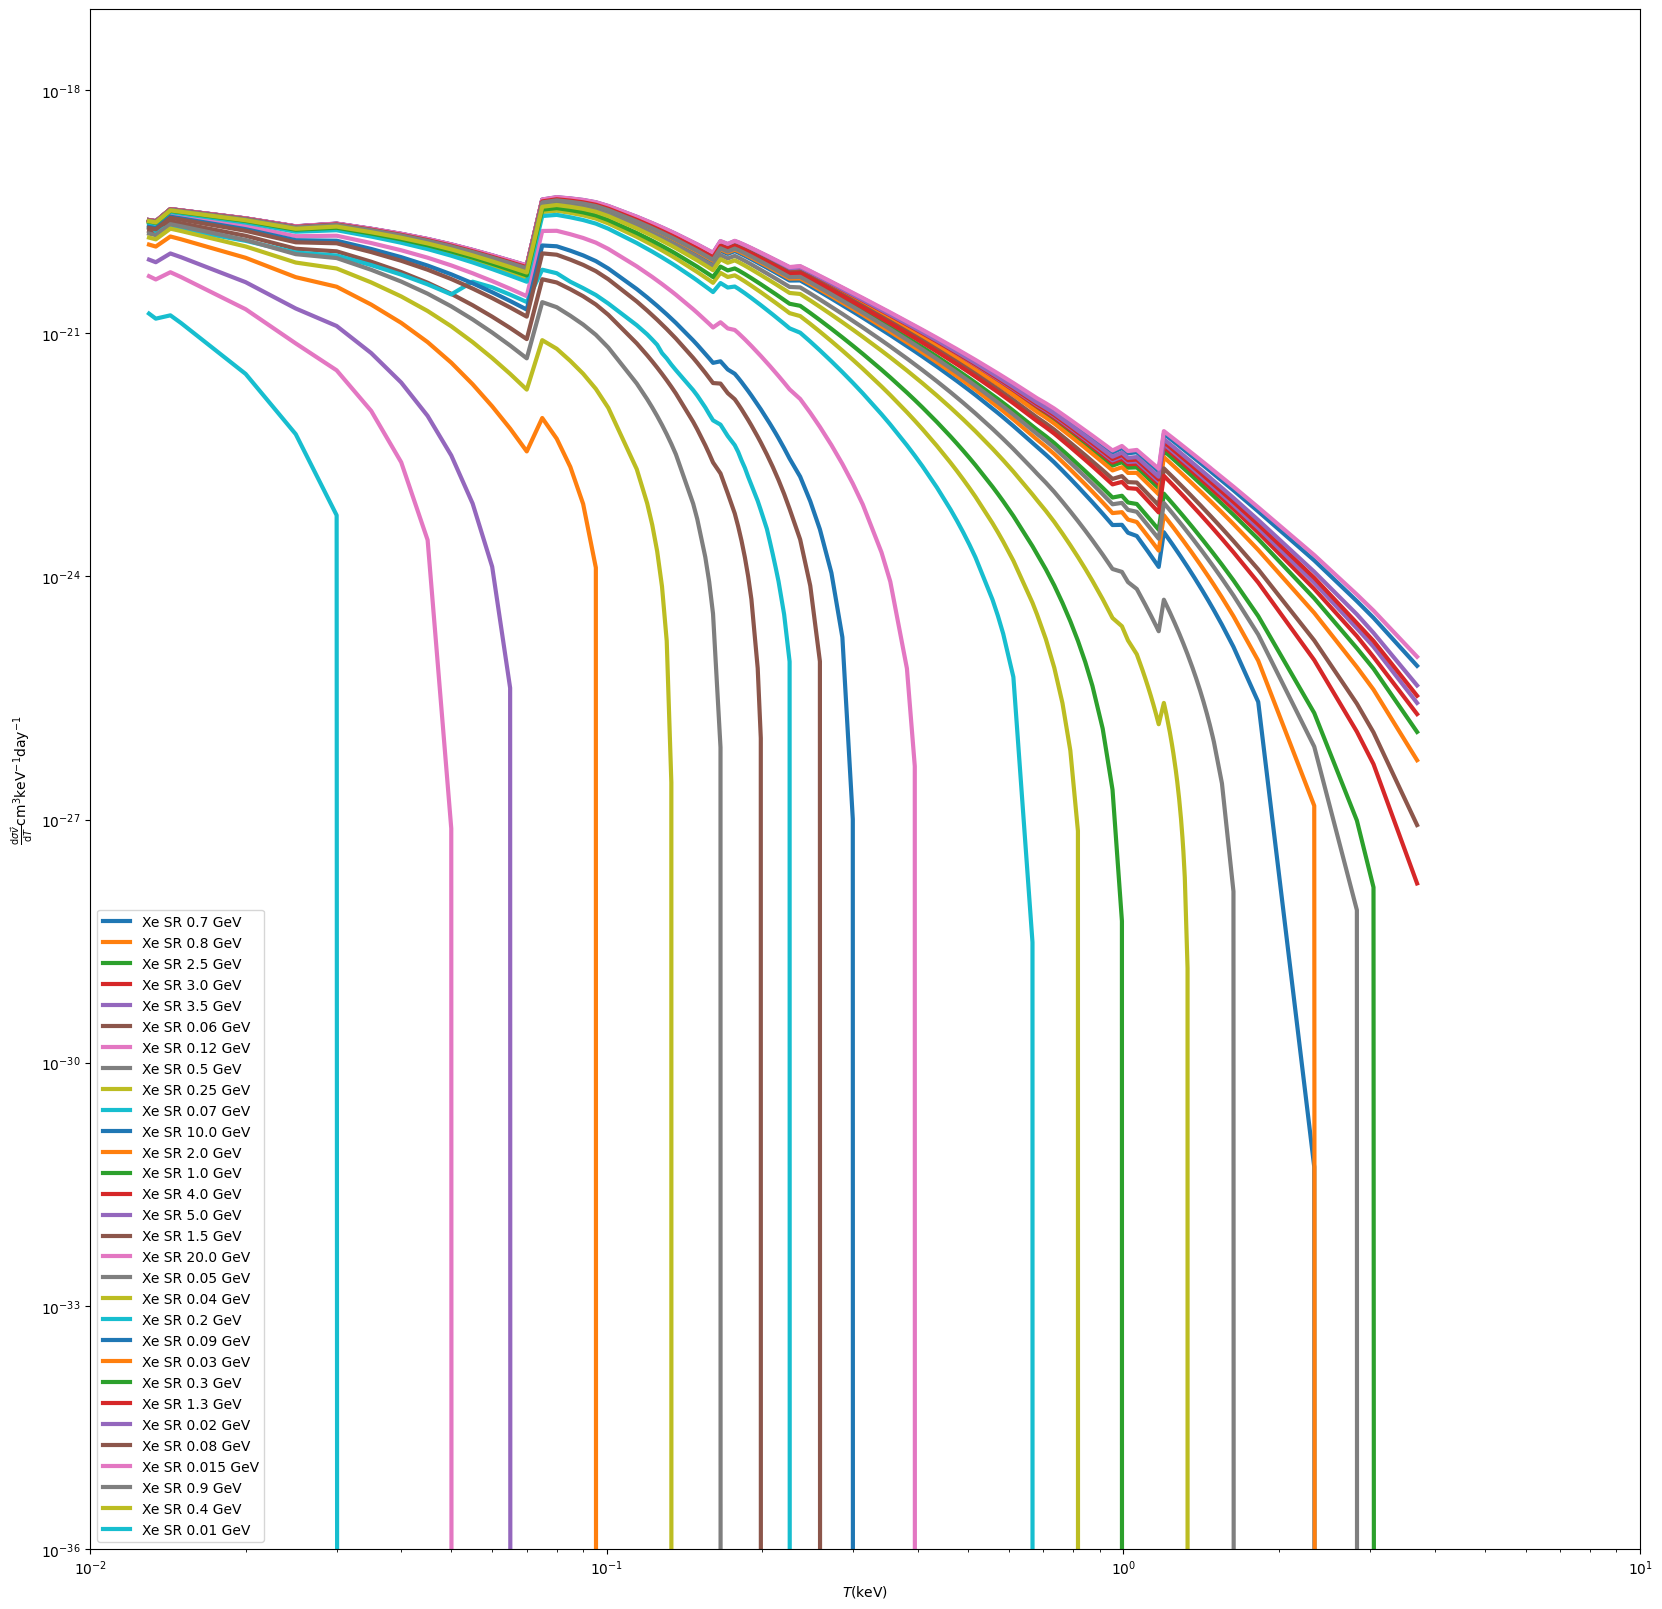

In [3]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

for fname in DD.get_valid_fnames("Xe", "SR"):
    DD.get_plot(fname).plot()
    
plt.legend(loc="lower left")
plt.show()

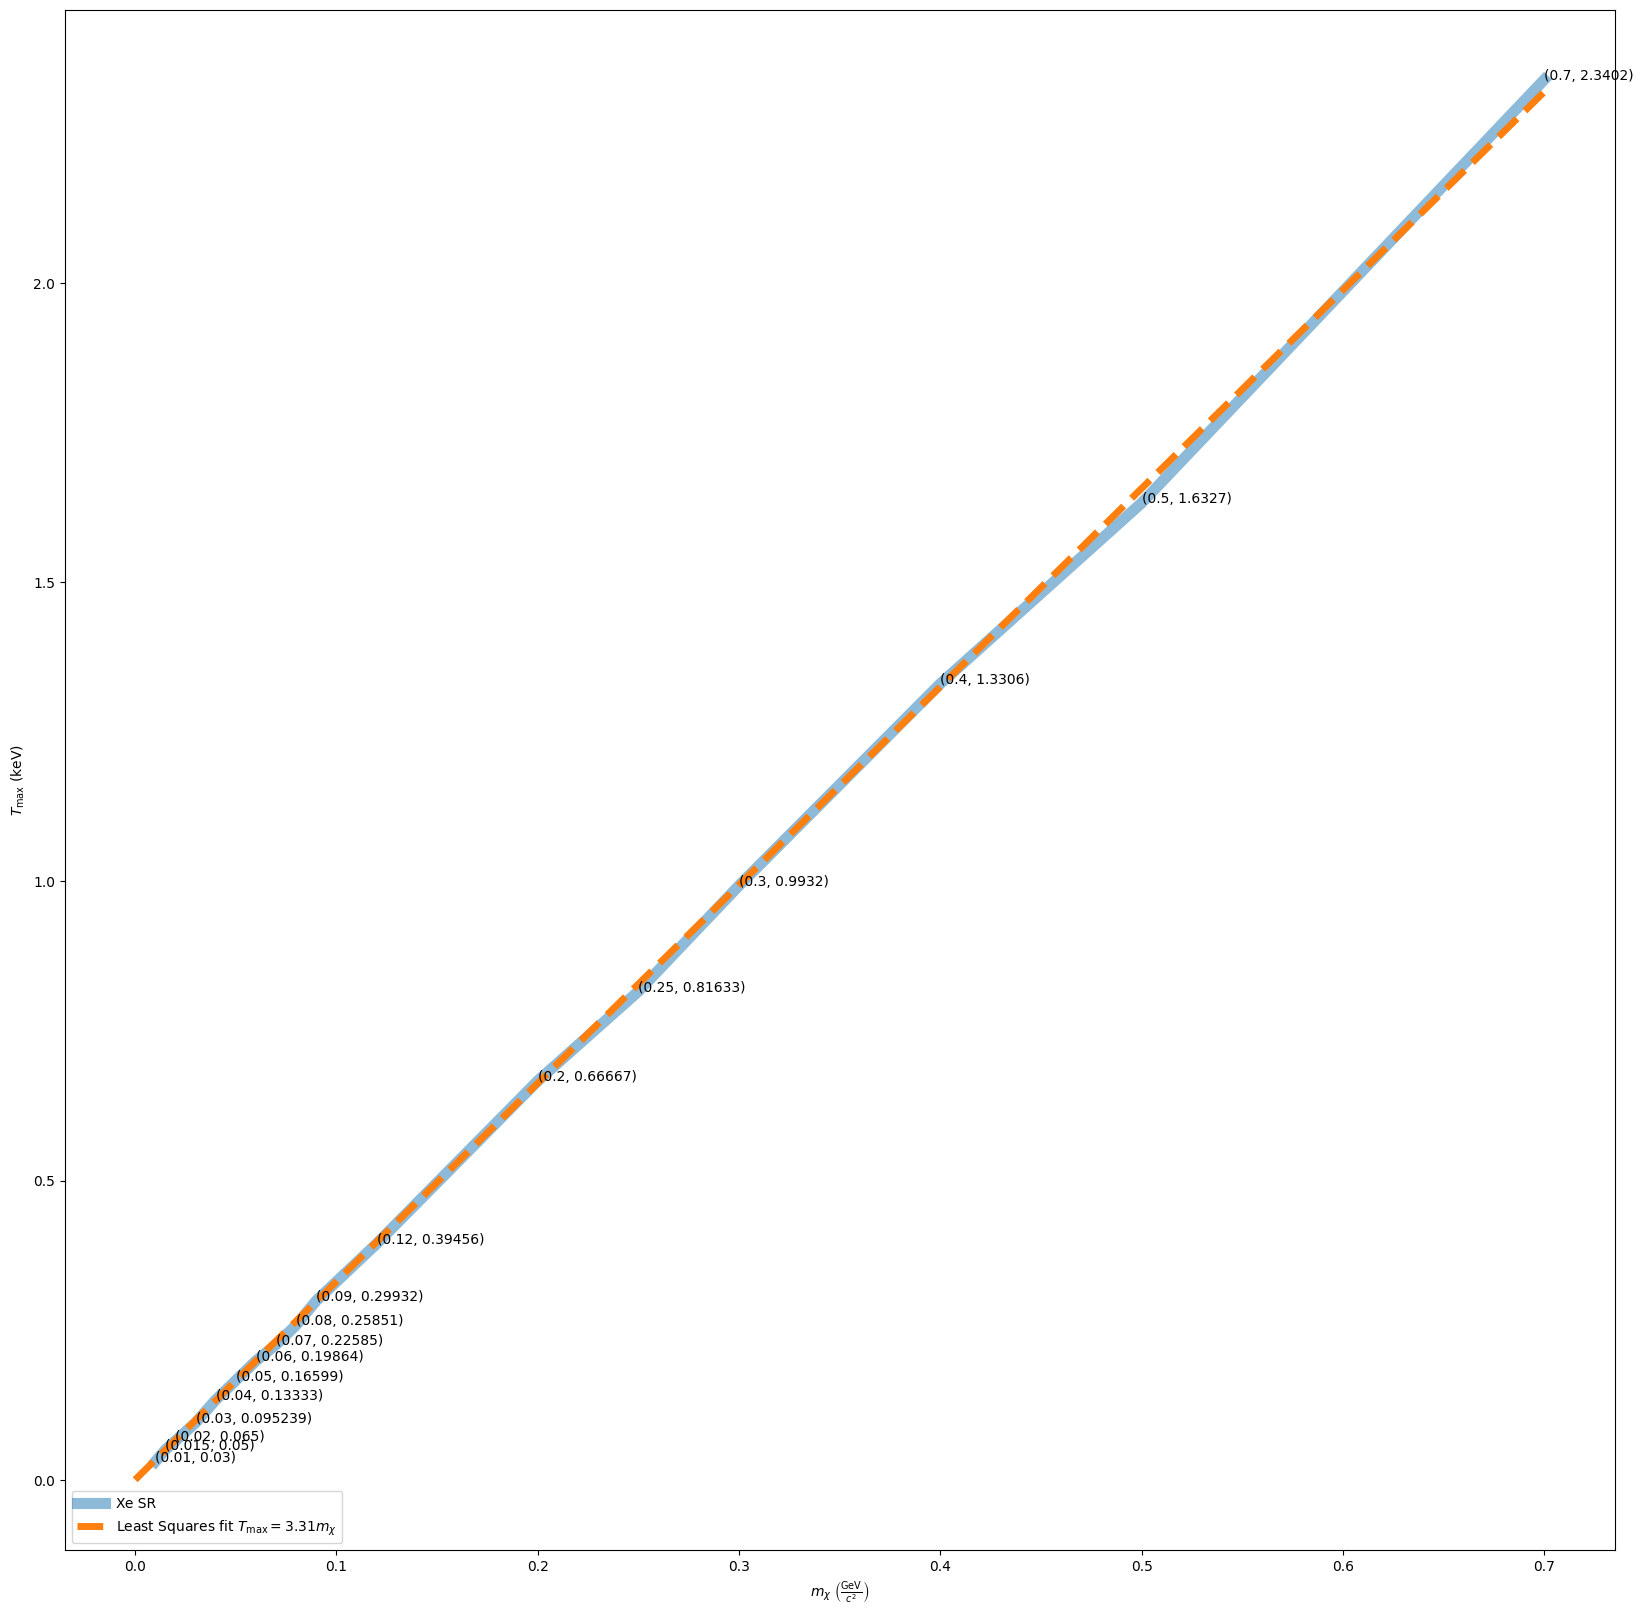

In [6]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

maxGeV = 0.7
Tmaxes = []
Masses = []

for fname in DD.get_valid_fnames("Xe", "SR"):
    _, _, _, en, _ = DD.parse_fname(fname)
    if en > maxGeV:
        continue
    Tmaxes.append(DD.get_tmax(fname))
    Masses.append(en)

# Main plot
tm_mat = DD.get_tmax_matrix(Masses, Tmaxes, 5)
plt.plot(tm_mat[:, 0], tm_mat[:, 1], label = "Xe SR", linewidth = 8, alpha = 0.5)

# Annotations
ax = plt.gca()
for xy in tm_mat:
    xy = tuple(xy)
    ax.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")

# Fit
x = np.linspace(0, maxGeV, 2)
m = DD.fit_tmaxes(tm_mat)
plt.plot(x, x* m, "--", alpha = 1, linewidth = 5, label = r"Least Squares fit $T_{\text{max}} = " + str(round(m,3)) + r"m_{\chi}$")

# Show
plt.ylabel(r"$T_\text{max}$ (keV)")
plt.xlabel(r"$m_{\chi}$ $\left(\frac{\text{GeV}}{c^2}\right)$")
plt.legend(loc="lower left")
plt.show()